In [45]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import classification_report, confusion_matrix,  plot_roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

dataFolder = os.path.join(os.path.dirname(os.path.abspath(os.path.dirname(''))), 'data')
sys.path.append(dataFolder)

### Preprocessing

In [2]:
finalDf = pd.read_pickle('../data/finalDf.pkl')

In [3]:
X = finalDf.drop('winner', axis=1)
y = finalDf['winner']
y = y.replace({'home':0, 'draw':1, 'away':2})

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=2023)

### Modelling

In [23]:
classifiers = [('Logistic Regression', LogisticRegression(class_weight={0:0.9, 1:1.5, 2:1})),
                ('Random Forest', RandomForestClassifier(n_estimators=500)),
                ('CatBoost', CatBoostClassifier(silent=True))]

In [59]:
vclf = VotingClassifier(classifiers, voting='soft')

In [60]:
pipe = Pipeline([('imputer', SimpleImputer(strategy='mean')),
                ('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.8)),
                ('vclf', vclf)])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.5165094339622641

In [27]:
print(classification_report(pipe.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.78      0.53      0.63      1879
           1       0.08      0.28      0.13       227
           2       0.48      0.52      0.50       862

    accuracy                           0.51      2968
   macro avg       0.45      0.44      0.42      2968
weighted avg       0.64      0.51      0.55      2968



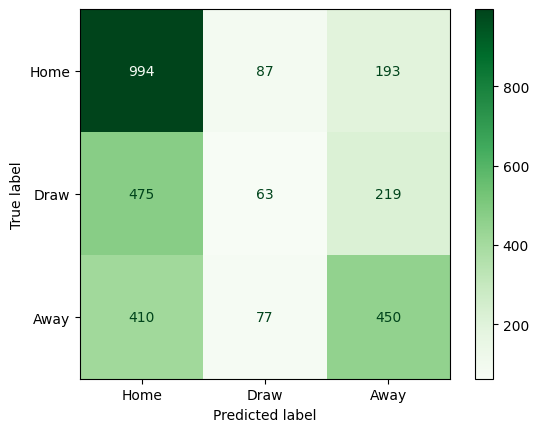

In [28]:
cfm = confusion_matrix(y_test, pipe.predict(X_test))
confusion=ConfusionMatrixDisplay(cfm, display_labels = ['Home', 'Draw', 'Away'])
confusion.plot(cmap='Greens')

In [50]:
y_score = pipe.predict_proba(X_test)

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)


array([[0, 1, 0]])

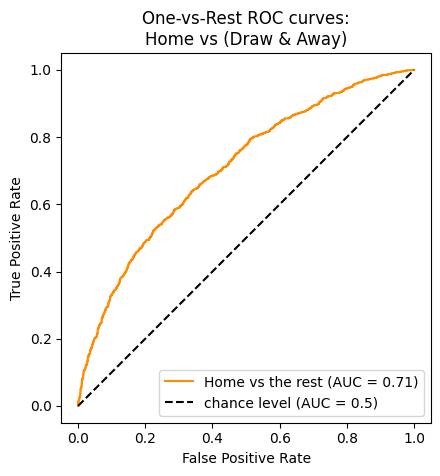

In [52]:
label_binarizer.transform([0])
class_of_interest = 0
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name="Home vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nHome vs (Draw & Away)")
plt.legend()
plt.show()

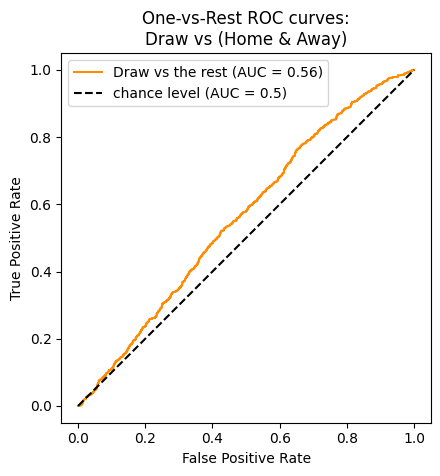

In [53]:
label_binarizer.transform([1])
class_of_interest = 1
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name="Draw vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nDraw vs (Home & Away)")
plt.legend()
plt.show()

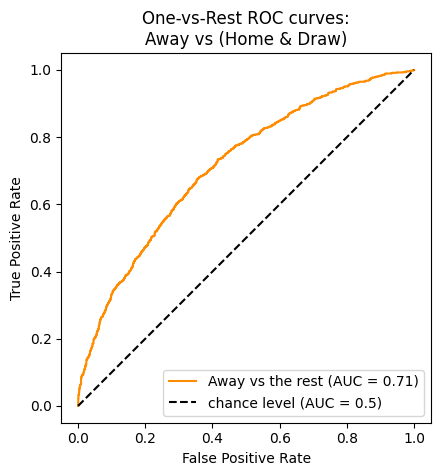

In [55]:
label_binarizer.transform([2])
class_of_interest = 2
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name="Away vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nAway vs (Home & Draw)")
plt.legend()
plt.show()